In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1007]:
df = pd.read_csv('cancer.csv')


In [1008]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       558 non-null    int64  
 1   diagnosis                558 non-null    object 
 2   radius_mean              558 non-null    float64
 3   texture_mean             558 non-null    float64
 4   perimeter_mean           558 non-null    float64
 5   area_mean                558 non-null    float64
 6   smoothness_mean          558 non-null    float64
 7   compactness_mean         558 non-null    float64
 8   concavity_mean           558 non-null    float64
 9   concave points_mean      558 non-null    float64
 10  symmetry_mean            558 non-null    float64
 11  fractal_dimension_mean   539 non-null    float64
 12  radius_se                558 non-null    float64
 13  texture_se               547 non-null    float64
 14  perimeter_se             5

In [1010]:
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean     19
radius_se                   0
texture_se                 11
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [1011]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,3.095380e+07,14.093708,19.147634,91.723118,651.392294,0.096415,0.103785,0.087570,0.048441,0.181370,...,16.230937,25.508387,106.933154,876.330108,0.132544,0.252636,0.269126,0.114011,0.290595,0.083881
std,1.261795e+08,3.496732,4.203558,24.090562,349.481152,0.013972,0.052234,0.078296,0.038303,0.027154,...,4.809520,6.043488,33.351068,567.630827,0.022813,0.154393,0.203668,0.065037,0.061409,0.017921
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.690252e+05,11.702500,16.152500,75.180000,420.300000,0.086443,0.064605,0.029500,0.020310,0.162100,...,13.015000,20.992500,84.122500,515.425000,0.116850,0.146300,0.114425,0.064330,0.251000,0.071557
50%,9.055480e+05,13.290000,18.760000,86.040000,546.200000,0.095865,0.092000,0.060070,0.033245,0.179400,...,14.915000,25.225000,97.585000,683.950000,0.131400,0.211750,0.225450,0.098855,0.282450,0.080025
75%,8.910437e+06,15.750000,21.590000,103.700000,779.125000,0.105300,0.130375,0.127075,0.072710,0.195675,...,18.550000,29.390000,124.750000,1048.500000,0.146250,0.338600,0.380575,0.161200,0.318275,0.092075
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1012]:
df['diagnosis'].value_counts()

diagnosis
B    352
M    206
Name: count, dtype: int64

In [1013]:
count_class_B , count_class_M = df.diagnosis.value_counts()
count_class_B

352

In [1014]:
df_class_B = df[df['diagnosis']=='B']

In [1015]:
from sklearn.utils import resample
df_class_M = df[df['diagnosis']=='M']
df_class_B=df[df['diagnosis']=='B']
df_class_M_upsampled= resample(df_class_M,replace=True,n_samples=count_class_B,random_state=42)
df = pd.concat([df_class_M_upsampled,df_class_B])
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,877486,M,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,...,23.360,32.06,166.40,1688.0,0.1322,0.56010,0.38650,0.17080,0.3193,0.09221
433,908445,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.08744,...,22.660,30.93,145.30,1603.0,0.1390,0.34630,0.39120,0.17080,0.3007,0.08314
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.18780,...,33.120,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082
14,84667401,M,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.08025,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310
203,87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,...,19.200,41.85,128.50,1153.0,0.2226,0.52090,0.46460,0.20130,0.4432,0.10860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,924342,B,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,13.890,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,10.840,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.650,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742


In [1016]:
df['diagnosis'].value_counts()

diagnosis
M    352
B    352
Name: count, dtype: int64

<Axes: title={'center': 'count target'}, xlabel='diagnosis'>

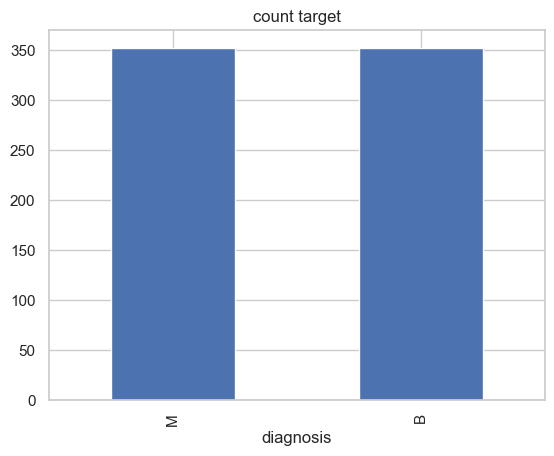

In [1017]:
df['diagnosis'].value_counts().plot(kind='bar',title='count target')

In [1018]:
X = df.drop(columns=['diagnosis','id'])
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,0.1767,0.05529,...,23.360,32.06,166.40,1688.0,0.1322,0.56010,0.38650,0.17080,0.3193,0.09221
433,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.08744,0.1943,0.06132,...,22.660,30.93,145.30,1603.0,0.1390,0.34630,0.39120,0.17080,0.3007,0.08314
180,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.18780,0.1800,0.05770,...,33.120,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.08025,0.2069,NaN,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310
203,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,0.2251,0.07421,...,19.200,41.85,128.50,1153.0,0.2226,0.52090,0.46460,0.20130,0.4432,0.10860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,13.890,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,10.840,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,10.650,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742


In [1019]:
print(X.isna().sum())  # Check for NaN values in each column


radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean     27
radius_se                   0
texture_se                 11
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64


In [1020]:
X['fractal_dimension_mean'] = X['fractal_dimension_mean'].fillna(X['fractal_dimension_mean'].median())
X['texture_se'] = X['texture_se'].fillna(X['texture_se'].median())


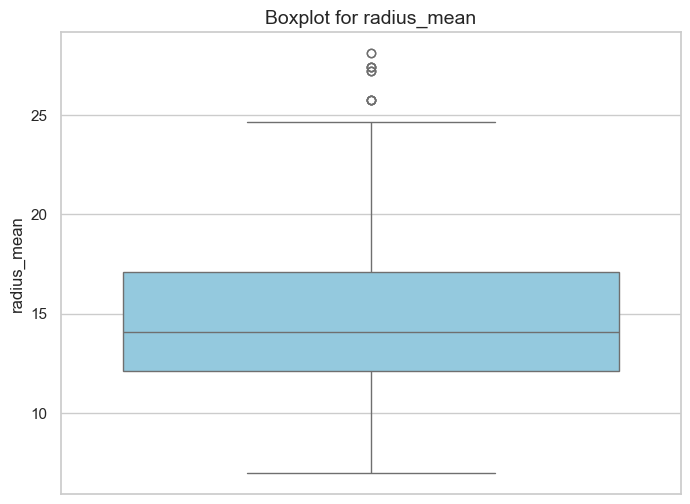

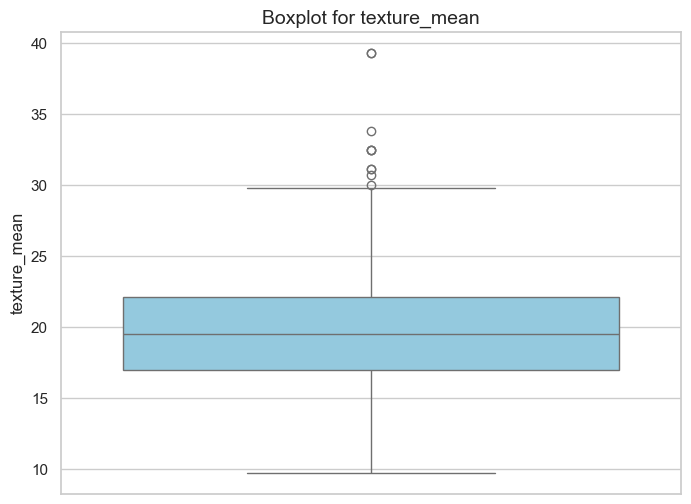

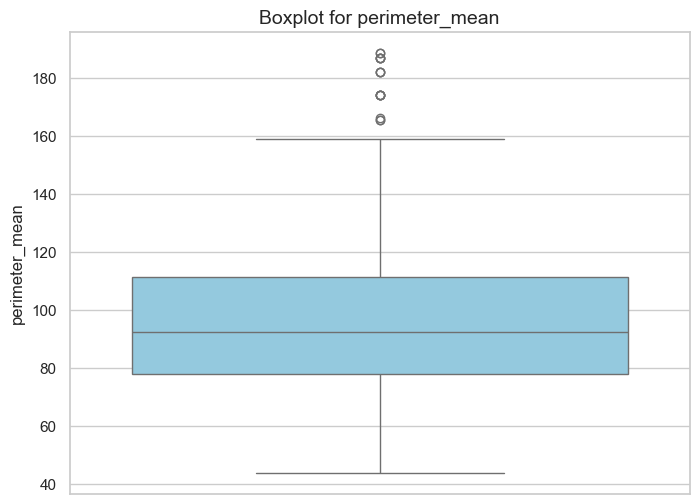

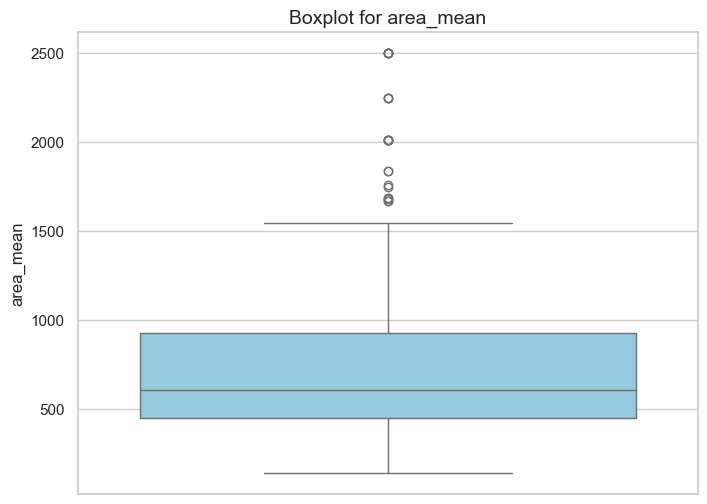

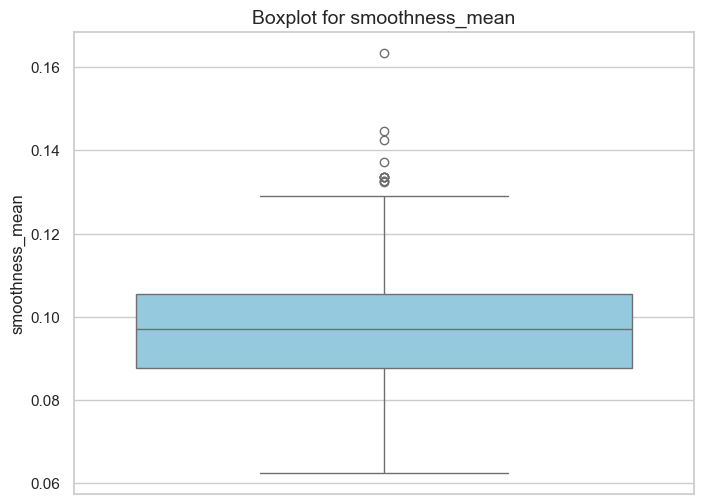

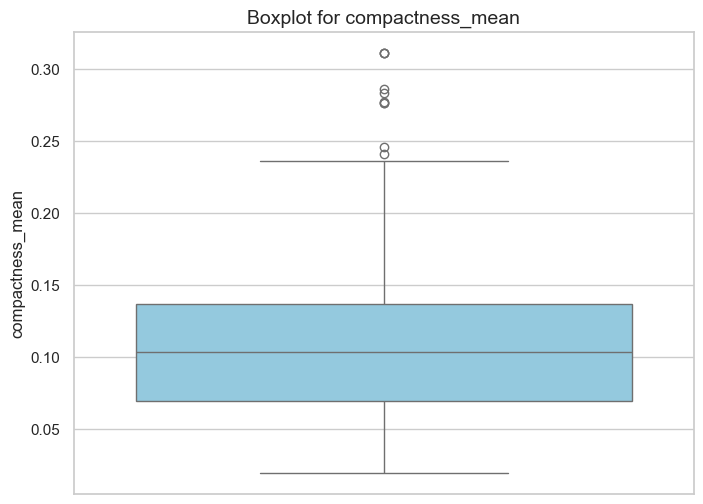

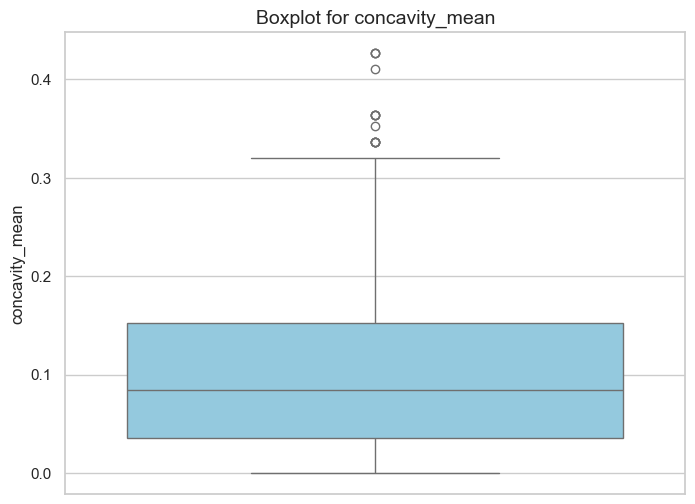

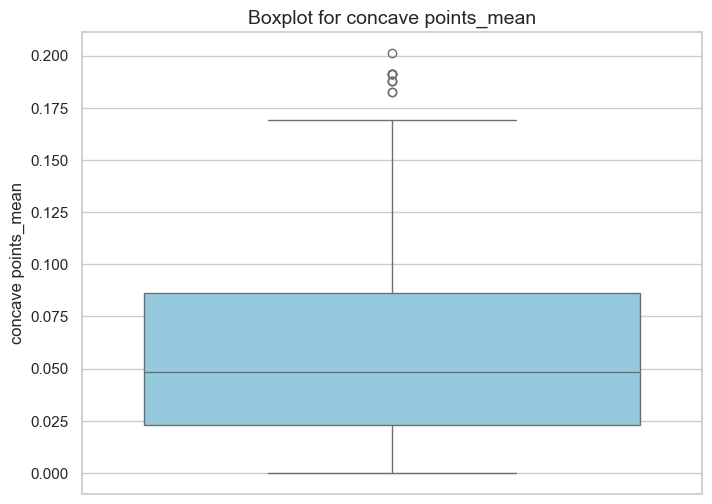

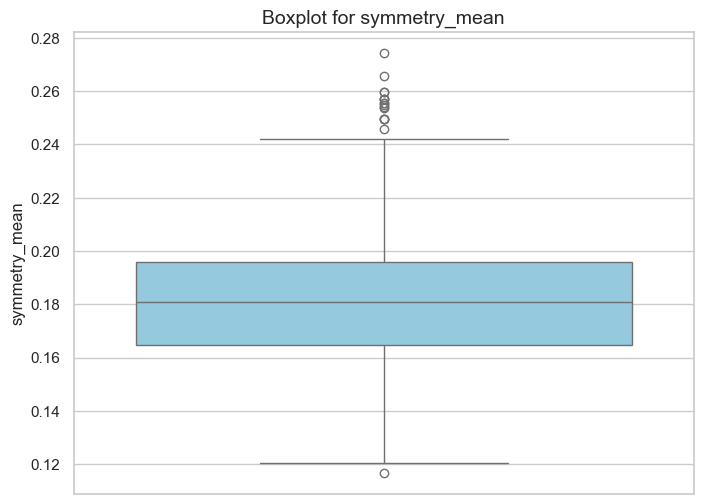

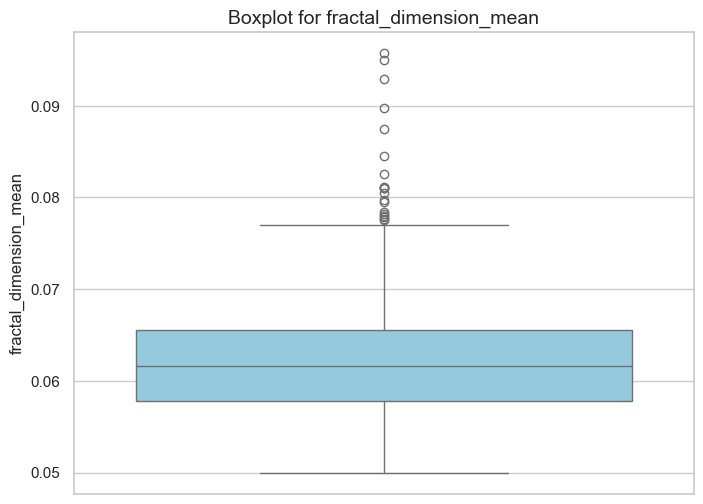

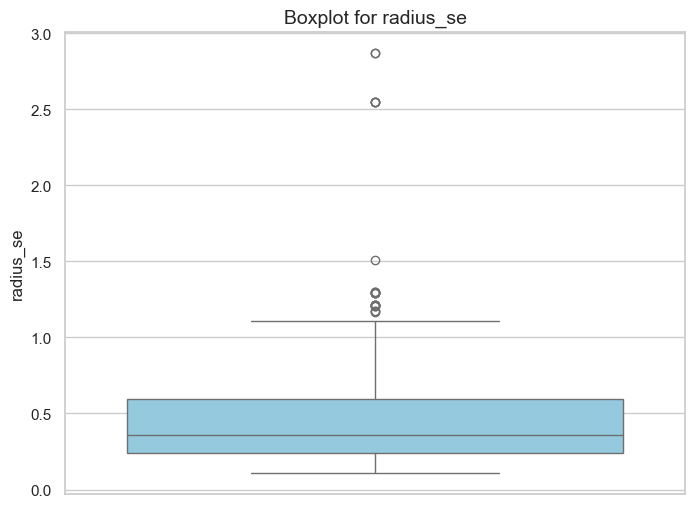

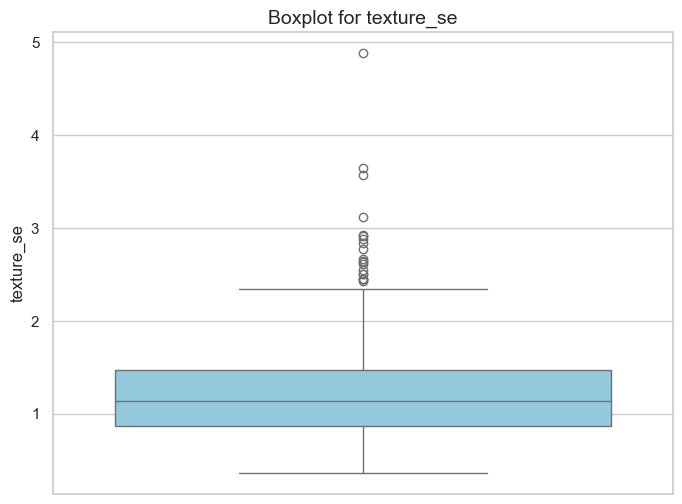

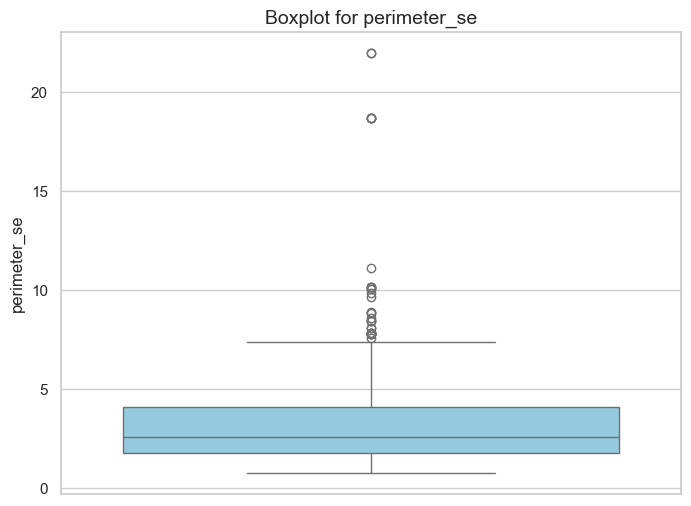

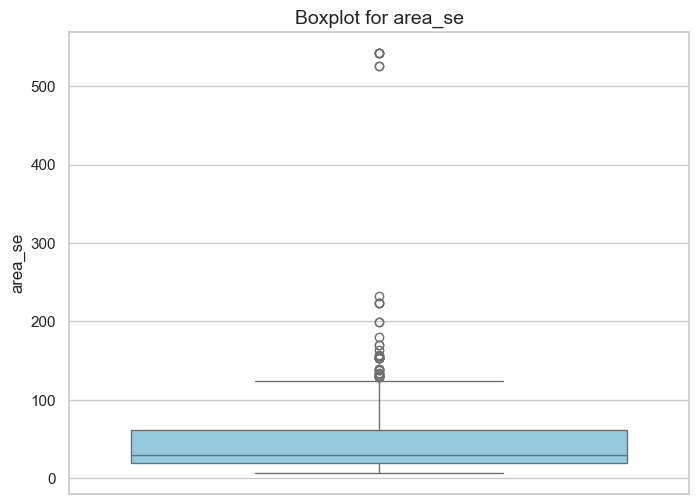

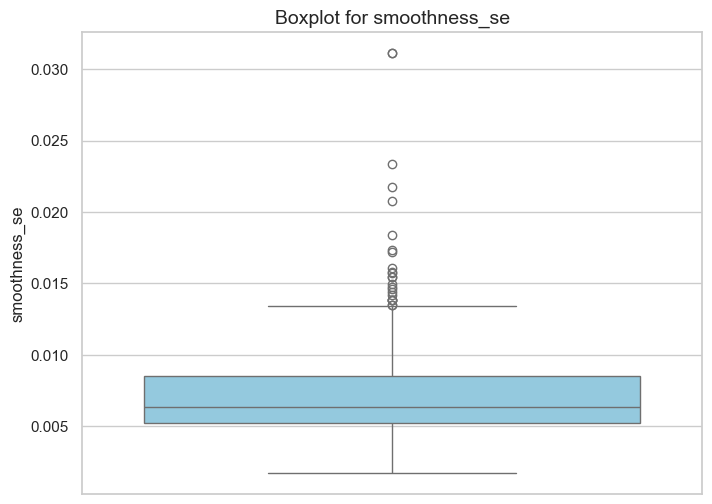

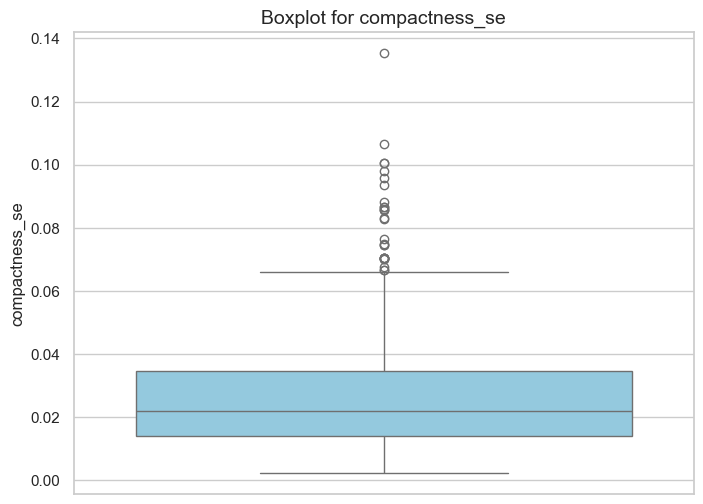

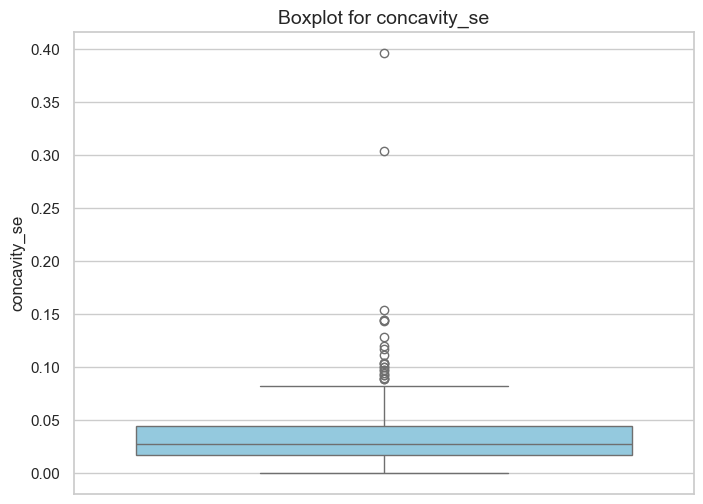

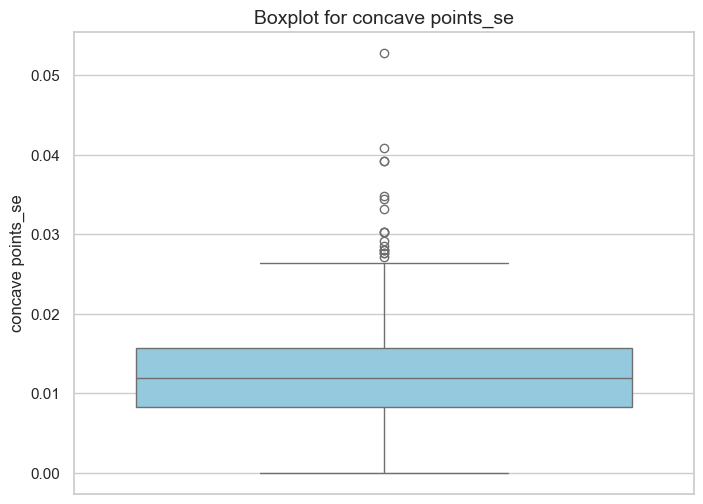

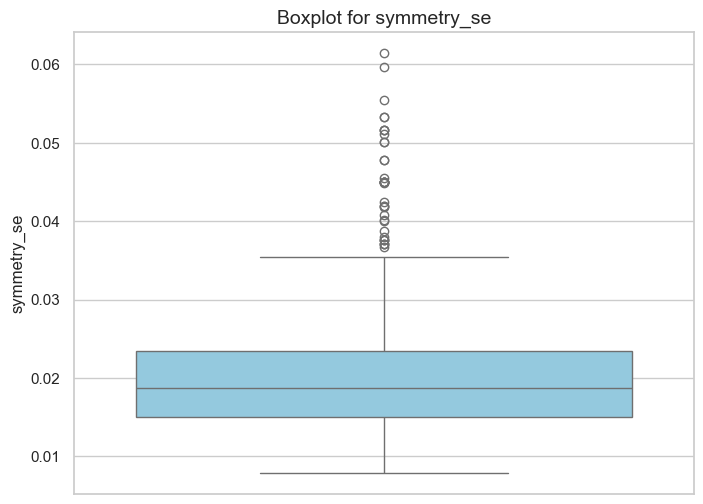

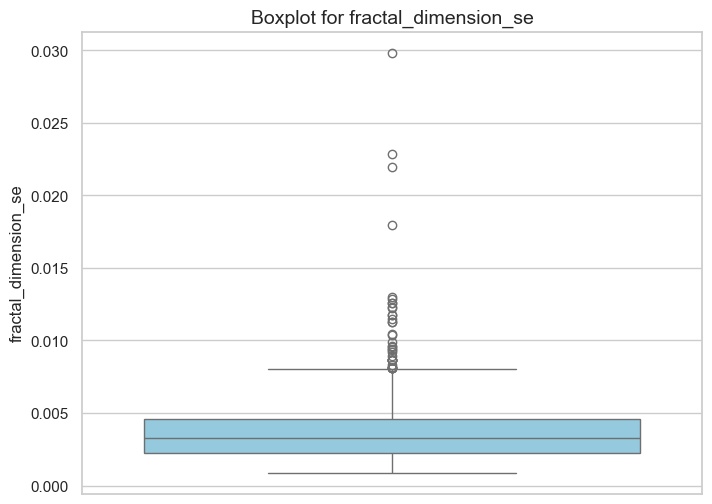

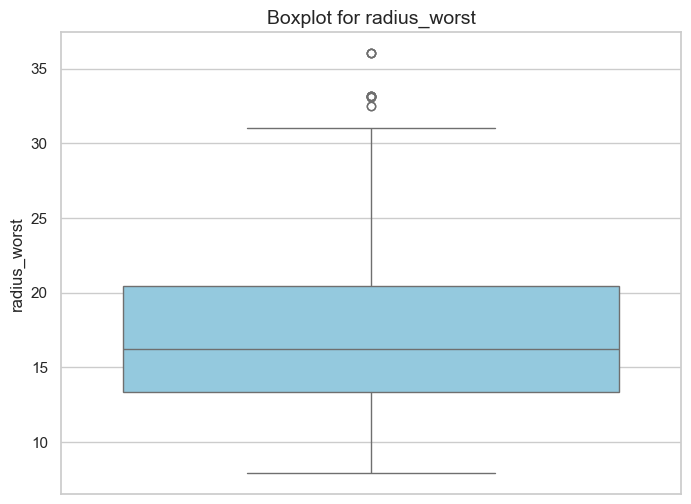

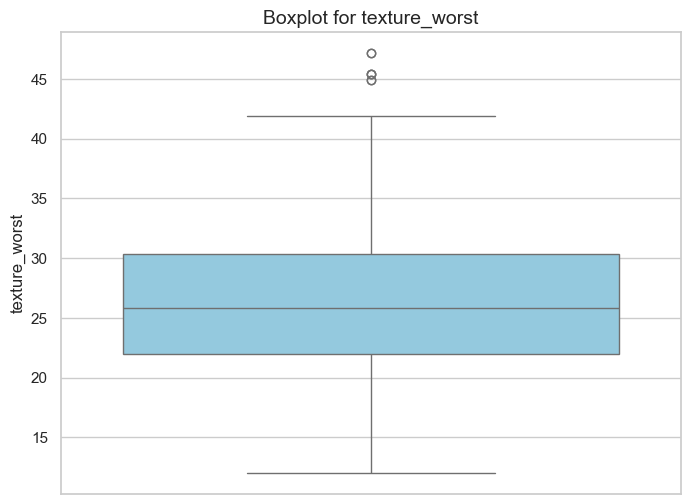

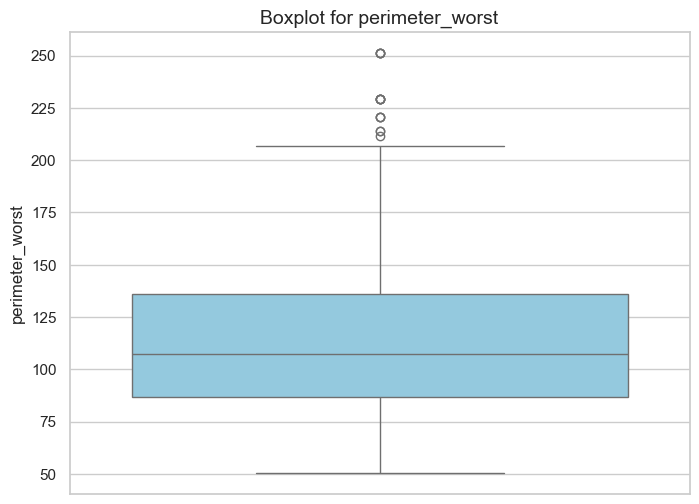

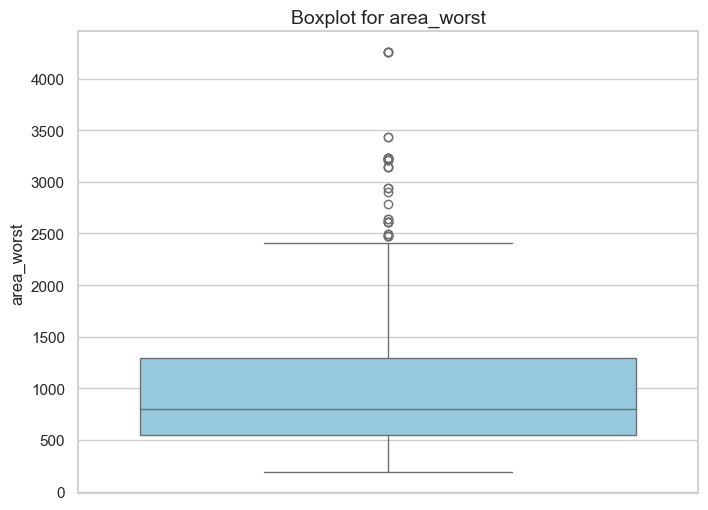

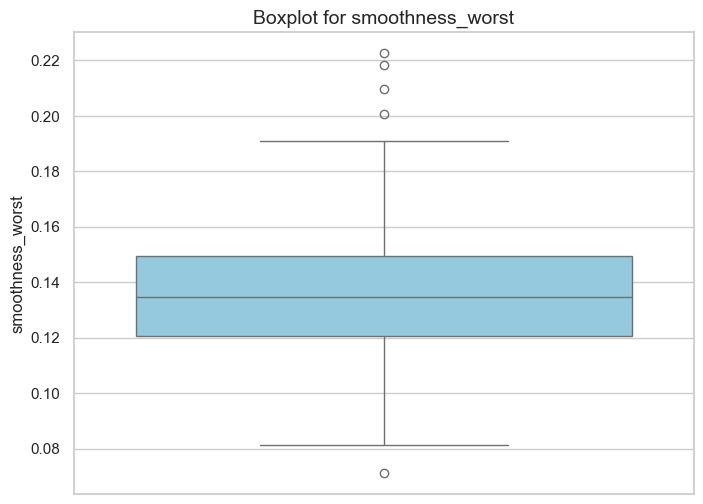

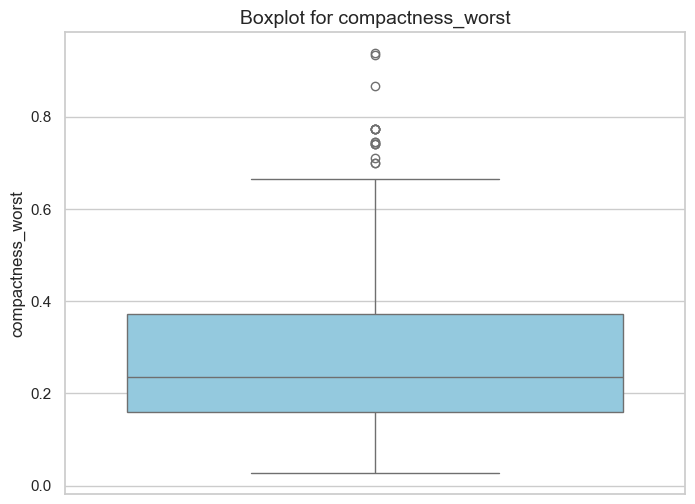

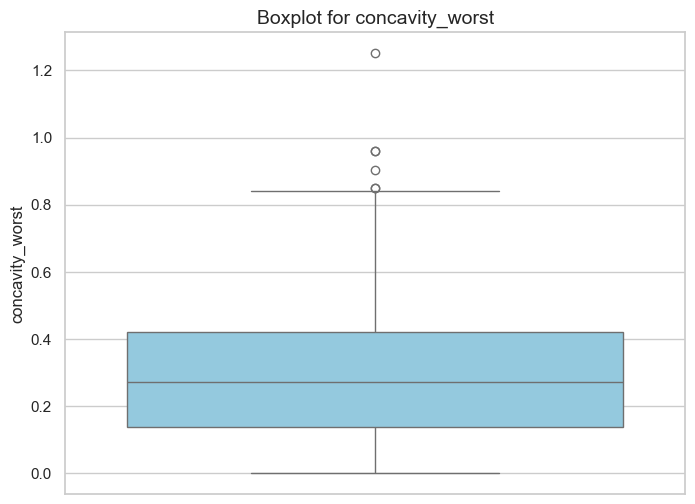

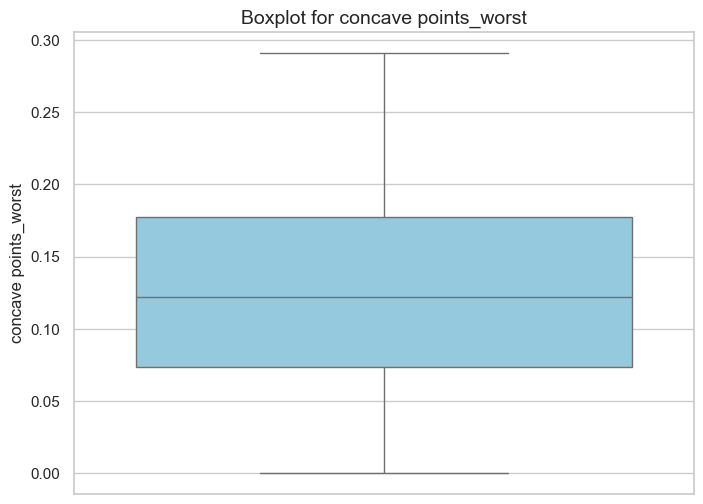

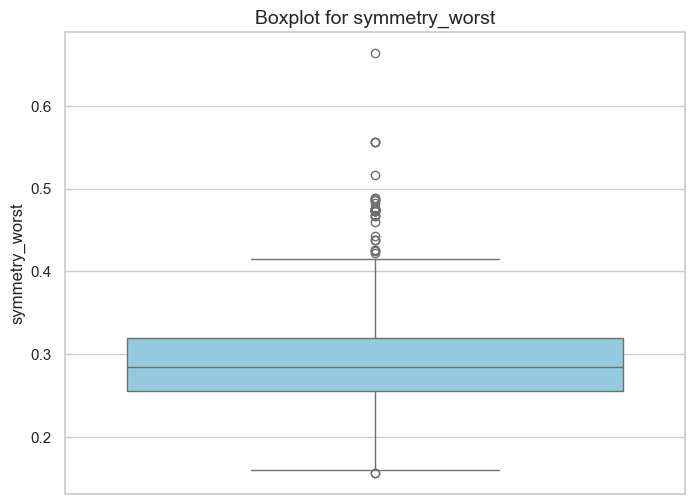

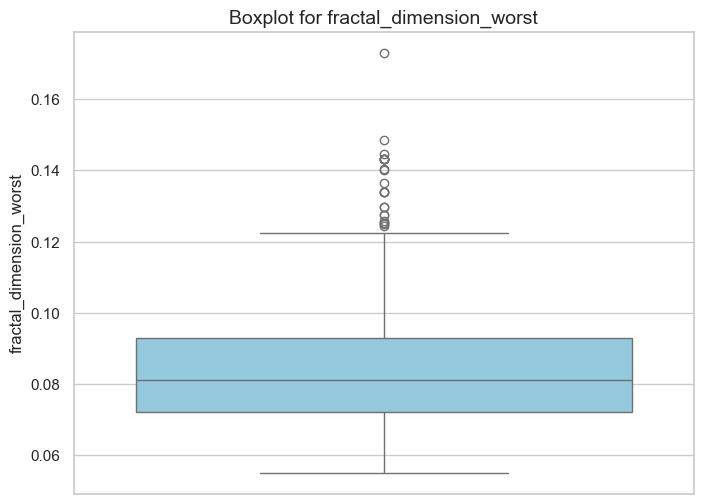

In [1021]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for col in X.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(y=X[col], color='skyblue')  
    plt.title(f'Boxplot for {col}', fontsize=14)  
    plt.ylabel(col, fontsize=12)
    plt.xlabel('')
    plt.show()


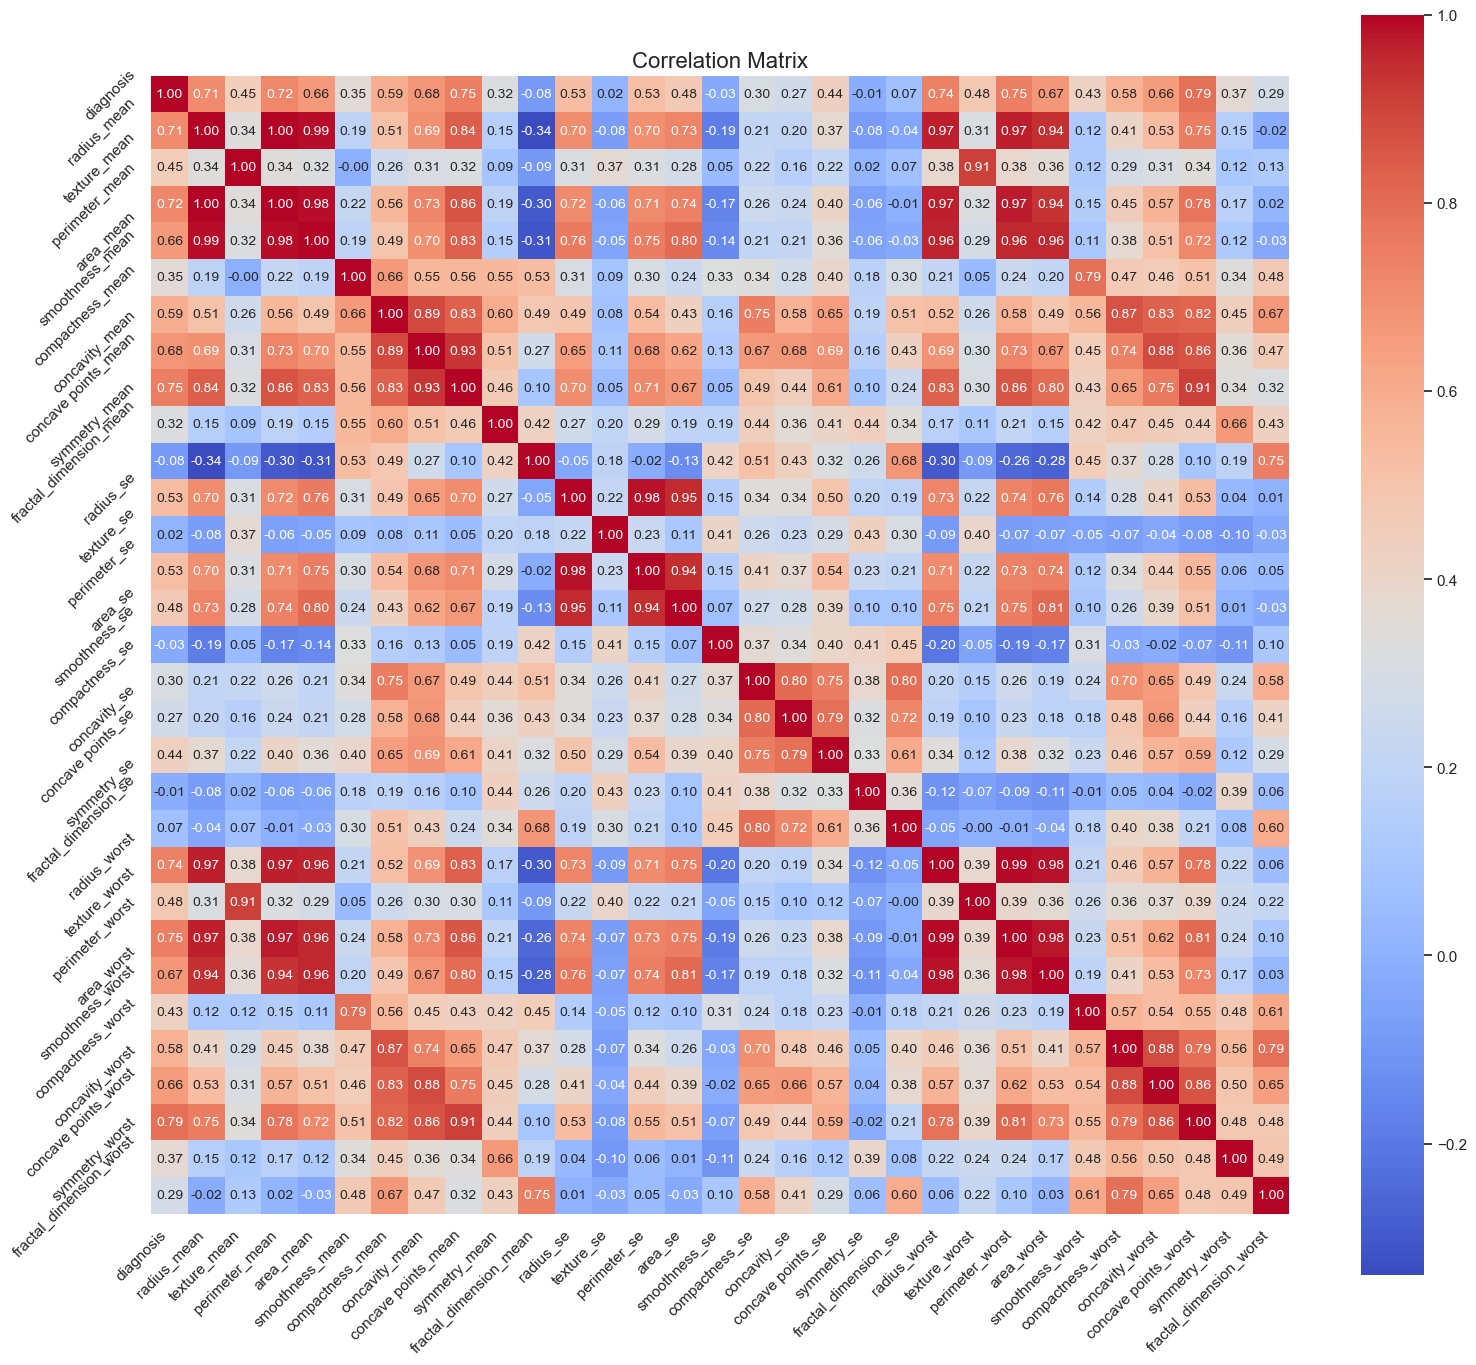

In [1022]:
df_without_id = df.drop(columns=['id'])
df_without_id['diagnosis'] = df_without_id['diagnosis'].map({'M': 1, 'B': 0})

correlation_matrix = df_without_id.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, 
            annot_kws={'size': 10}, square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

plt.title('Correlation Matrix', fontsize=16)

plt.tight_layout()  
plt.show()


In [1023]:
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1024]:
Y=df['diagnosis']
Y

198    M
433    M
180    M
14     M
203    M
      ..
553    B
554    B
555    B
556    B
557    B
Name: diagnosis, Length: 704, dtype: object

In [1025]:
Y.value_counts()

diagnosis
M    352
B    352
Name: count, dtype: int64

In [1026]:

Y=Y.map({'B':0,'M':1})

In [1027]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [1028]:
from sklearn.preprocessing import RobustScaler
scaler  = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.7), 
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


loss='sparse_categorical_crossentropy' => for binary classification, binary_crossentropy would be more appropriate because it's designed to handle cases where each class is represented by a single output probability.


In [1030]:
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=0)


5/5 [==============================] - 0s 2ms/step


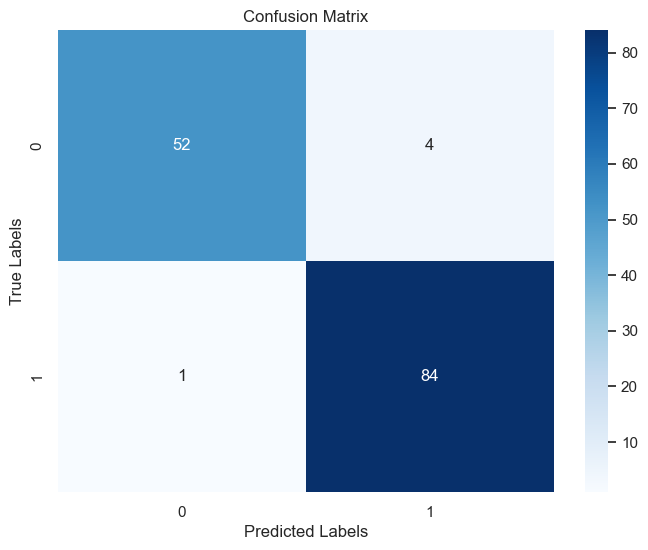

In [1031]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

# Convert predictions to class labels (for classification)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

                Predicted Negative (0)	Predicted Positive (1)
Actual Negative (0)	TN = 53	FP = 3
Actual Positive (1)	                          FN = 1	TP = 84

In [1032]:

train_accuracy = history.history['accuracy'][-1]  
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")



test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 91.90%
5/5 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9645
Test Loss: 0.08670972287654877
Test Accuracy: 96.45%


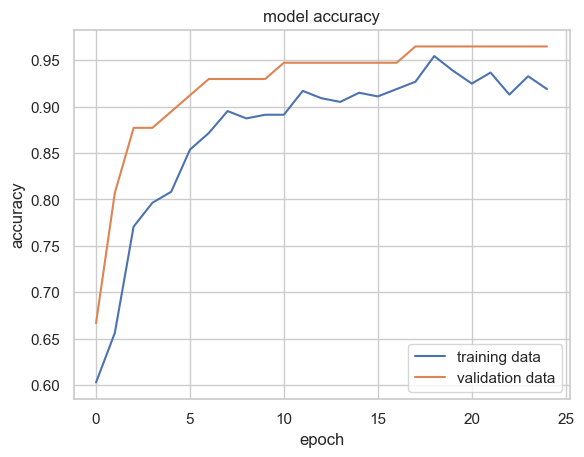

In [1033]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

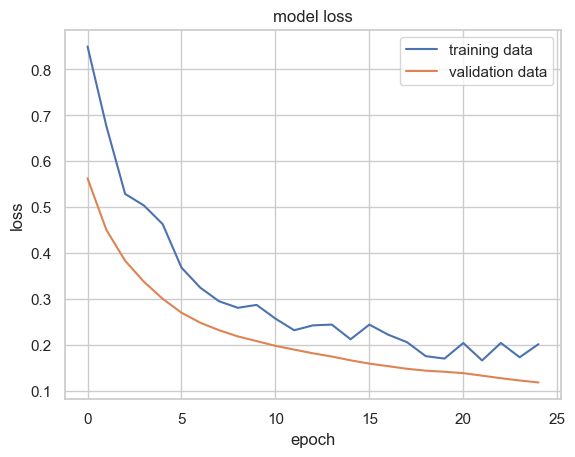

In [1034]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [1035]:
Y_test

503    1
75     1
260    1
229    1
213    1
      ..
168    1
244    1
13     1
287    0
315    0
Name: diagnosis, Length: 141, dtype: int64

In [1038]:
import warnings

input_data = (15.22,30.62,103.4,716.9,0.1048,0.2087,0.255,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.52,42.79,128.7,915,0.1417,0.7917,1.17,0.2356,0.4089,0.1409)

warnings.filterwarnings('ignore')

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 26ms/step
[[2.4679926e-04 6.3566130e-01]]
[1]
The tumor is Malignant


sigmoid + 2 => If you only have two classes, it's better to:
Use one output unit with the sigmoid activation (which outputs the probability of one class, and the other class's probability can be inferred as 1 - probability).
Use binary_crossentropy as the loss function, which is specifically designed for binary classification (2 classes).

In [1037]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

new_data = pd.read_csv('unseen_data.csv') 

X_new = new_data.drop(columns=['diagnosis','id'])  
y_true = new_data['diagnosis']

y_true=y_true.map({'B':0,'M':1})

X_new_scaled = scaler.transform(X_new)

y_pred = model.predict(X_new_scaled)

y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)

print(f'Accuracy of the model on new data: {accuracy * 100:.2f}%')

comparison = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred_labels})
print(comparison)


1/1 [==============================] - 0s 47ms/step
Accuracy of the model on new data: 100.00%
    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       0          0
